In [1]:
from __future__ import print_function

#Probability and Statistics in Python

##Linear Regression

###1: Drawing lines

Before we get started with linear regression, let's take a look at how to draw lines.

The simplest possible line is y=x . This means that the value of a point on the y-axis is the same as the corresponding value on the x-axis.

####Instructions

Plot the equation y=x−1, using the existing x variable.

Plot the equation y=x+10, using the existing x variable.

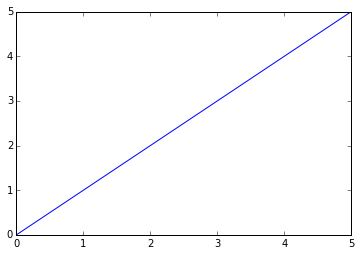

y: [1 2 3 4 5 6]


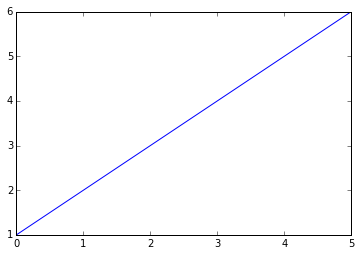

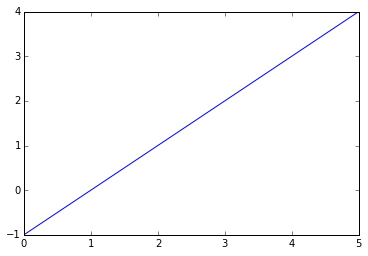

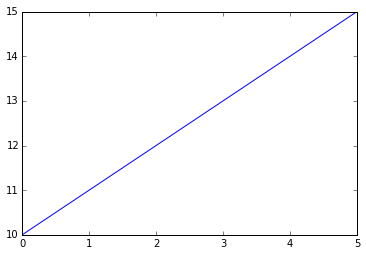

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [0, 1, 2, 3, 4, 5]
# Going by our formula, every y value at a position is the same as the x-value in the same position.
# We could write y = x, but let's write them all out to make this more clear.
y = [0, 1, 2, 3, 4, 5]

# As you can see, this is a straight line that passes through the points (0,0), (1,1), (2,2), and so on.
plt.plot(x, y)
plt.show()

# Let's try a slightly more ambitious line.
# What if we did y = x + 1?
# We'll make x an array now, so we can add 1 to every element more easily.
x = np.asarray([0, 1, 2, 3, 4, 5])
y = x + 1

# y is the same as x, but every element has 1 added to it.
print("y:", y)

# This plot passes through (0,1), (1,2), and so on.
# It's the same line as before, but shifted up 1 on the y-axis.
plt.plot(x, y)
plt.show()

# By adding 1 to the line, we moved what's called the y-intercept -- where the line intersects with the y-axis.
# Moving the intercept can shift the whole line up (or down when we subtract).
y = x - 1
plt.plot(x, y)
plt.show()

y = x + 10
plt.plot(x, y)
plt.show()

###2: Working with slope

Now that we have a way to move the line up and down, what about the steepness of the line?

This was unchanged earlier -- the values on the line always went up 1 on the y-axis every time they went up 1 on the x-axis.

What if we want to make a line that goes up 2 numbers on the y-axis every time it goes up 1 on the x-axis?

This is where slope comes in. The slope is multiplied by the x-value to get the new y value.

It looks like this: y=mx . If we set the slope, m , equal to 2, we'll get what we want.

####Instructions

Plot the equation y=4x , using the existing x variable.

Plot the equation y=.5x , using the existing x variable.

Plot the equation y=−2x , using the existing x variable.

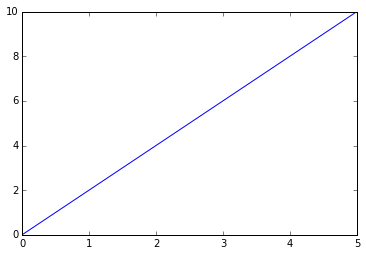

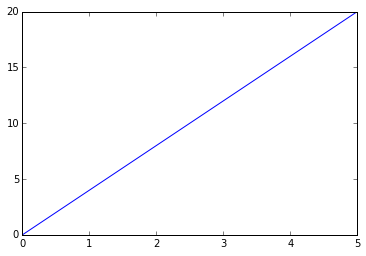

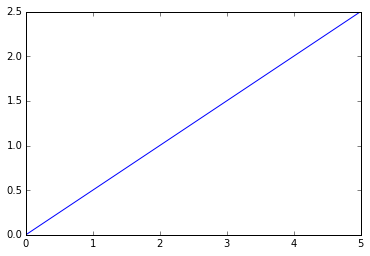

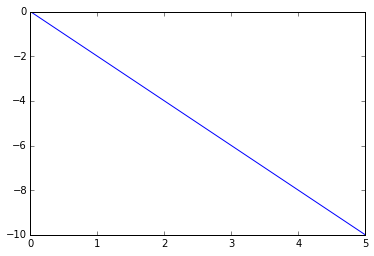

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.asarray([0, 1, 2, 3, 4, 5])

# Let's set the slope of the line to 2.
y = 2 * x

# See how this line is "steeper" than before?  The larger the slope is, the steeper the line becomes.
# On the flipside, fractional slopes will create a "shallower" line.
# Negative slopes will create a line where y values decrease as x values increase.
plt.plot(x, y)
plt.show()

y = 4 * x
plt.plot(x, y)
plt.show()

y = .5 * x
plt.plot(x, y)
plt.show()

y = -2 * x
plt.plot(x, y)
plt.show()

###3: Starting out with linear regression

The r-value indicates how correlated two variables are. This can range from no correlation to a negative correlation to a positive correlation.

The more correlated two variables are, the easier it becomes to use one to predict the other. For instance, if I know that how much I pay for my steak is highly positively correlated to the size of the steak (in ounces), I can create a formula that helps me predict how much I would be paying for my steak.

The way we do this is with linear regression. Linear regression gives us a formula, where if we plug in the value for one variable, we get the value for the other variable.

The equation to create the formula takes the form $y = mx + b$.

You might recognize pieces of this equation from the past two screens -- we're just adding the intercept and slope into one equation.

This equation is saying "the predicted value of the second variable (y) is equal to the value of the first variable (x) times slope plus the intercept".

We have to calculate values for m  and b  before we can use our formula.

We'll calculate slope first -- the formula is $\frac{cov(x,y)}{\sigma_{2}^{x}}$, which is just the covariance of x and y divided by the variance of x.

We can use the cov function to calculate covariance, and the .var() method on pandas series to calculate variance.

In [4]:
import pandas

wine_quality = pandas.read_csv("data/wineQualityWhites.csv")
wine_quality[:5]

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


####Instructions

Calculate the slope you would need to predict the "quality" column (y) using the "density" column (x).

Assign the slope to slope_density.

In [5]:
from numpy import cov

slope_density = cov(wine_quality["density"], wine_quality["quality"])[0, 1] / wine_quality["density"].var()
print("slope_density:", slope_density)

slope_density: -90.9423999421


###4: Finishing linear regression

Now that we can calculate the slope for our linear regression line, we just need to calculate the intercept.

The intercept is just how much "higher", or "lower" the average y point is than our predicted value.

We can compute the intercept by taking the slope we calculated and doing this: $\bar{y} - m\bar{x}$. So we just take the mean of the y values, and then subtract the slope times the mean of the x values from that.

Remember that we can calculate the mean by using the .mean() method.

####Instructions

Calculate the y-intercept that you would need to predict the "quality" column (y) using the "density" column (x).

Assign the result to intercept_density.

In [6]:
from numpy import cov

# This function will take in two columns of data, and return the slope of the linear regression line.
def calc_slope(x, y):
    return cov(x, y)[0, 1] / x.var()

intercept_density = wine_quality["quality"].mean() - (calc_slope(wine_quality["density"], wine_quality["quality"]) * wine_quality["density"].mean())
print("intercept_density:", intercept_density)

intercept_density: 96.2771445761


###5: Making predictions

Now that we've computed our slope and our intercept, we can make predictions about the y-values from the x-values.

In order to do this, we go back to our original formula: $y = mx + b$, and just plug in the values for $m$ and $b$.

We can then compute predicted y-values for any x-value. This lets us make predictions about the quality of x-values that we've never seen. For example, a wine with a density of .98 isn't in our dataset, but we can make a prediction about what quality a reviewer would assign to a wine with this density.

Depending on how correlated the predictor and the value being predicted are, the predictions may be good or bad.

Let's look at making predictions now, and we'll move on to figuring out how good they are.

####Instructions

Write a function to compute the predicted y-value from a given x-value.

Use the .apply() method on the "density" column to apply the function to each item in the column. This will compute all the predicted y-values.

Assign the result to predicted_quality.

In [7]:
from numpy import cov

def calc_slope(x, y):
    return cov(x, y)[0, 1] / x.var()

# Calculate the intercept given the x column, y column, and the slope
def calc_intercept(x, y, slope):
    return y.mean() - (slope * x.mean())

slope = calc_slope(wine_quality["density"], wine_quality["quality"])
print("slope:", slope)

intercept = calc_intercept(wine_quality["density"], wine_quality["quality"], slope)
print("intercept:", intercept)

def compute_predicted_y(x):
    return x * slope + intercept

predicted_quality = wine_quality["density"].apply(compute_predicted_y)
print("predicted_quality:\n", predicted_quality[:10])

slope: -90.9423999421
intercept: 96.2771445761
predicted_quality:
 0    5.243802
1    5.880399
2    5.780362
3    5.734891
4    5.734891
5    5.780362
6    5.798551
7    5.243802
8    5.880399
9    5.898588
Name: density, dtype: float64


###6: Finding error

Now that we know how to make a regression line manually, let's look at an easier way to do it, using a function from scipy.

The linregress function makes it simple to do linear regression.

Now that we know a simpler way to do linear regression, let's look at how to figure out if our regression is good or bad.

We can plot out our line and our actual values, and see how far apart they are on the y-axis.

We can also compute the distance between each prediction and the actual value -- these distances are called residuals.

If we add up the sum of the squared residuals, we can get a good error estimate for our line.

We have to add the squared residuals, because just like differences from the mean, the residuals add to 0 if they aren't squared.

To put it in math terms, the sum of squared residuals is: $\sum\limits_{i=1}^n{(y_{i} - \hat{y}_{i})^2}$ is the predicted y value at position i.

####Instructions

Using the given slope and intercept, calculate the predicted y values.

Subtract each predicted y value from the corresponding actual y value, square the difference, and add all the differences together.

This will give you the sum of squared residuals. Assign this value to rss.

In [8]:
import numpy
from scipy.stats import linregress

# We've seen the r_value before -- we'll get to what p_value and stderr_slope are soon -- for now, don't worry about them.
slope, intercept, r_value, p_value, stderr_slope = linregress(wine_quality["density"], wine_quality["quality"])

# As you can see, these are the same values we calculated (except for slight rounding differences).
print("slope:", slope)
print("intercept:", intercept)

predicted_y = numpy.asarray([slope * x + intercept for x in wine_quality["density"]])
print("predicted_y:", predicted_y[:10])

residuals = (wine_quality["quality"] - predicted_y) ** 2
rss = sum(residuals)
print("rss:", rss)

slope: -90.9423999421
intercept: 96.2771445761
predicted_y: [ 5.24380223  5.88039903  5.78036239  5.73489119  5.73489119  5.78036239
  5.79855087  5.24380223  5.88039903  5.89858751]
rss: 3478.68946969


###7: Standard error

From the sum of squared residuals, we can get to the standard error. The standard error is similar to the standard deviation, but it tries to make an estimate for the whole population of y-values -- even the ones we haven't seen yet that we may want to predict in the future.

The standard error lets us quickly determine how good or bad a linear model is at prediction.

The equation for standard error is $\sqrt{\frac{RSS}{n - 2}}$.

You take the sum of squared residuals, divide by the number of y-points minus two, and then take the square root.

You might be wondering about why 2 is subtracted -- this is because of differences between the whole population and a sample. This will be explained in more depth later on.

####Instructions

Calculate the standard error using the above formula.

Calculate what percentage of actual y values are within 1 standard error of the predicted y value. Assign the result to within_one.

Calculate what percentage of actual y values are within 2 standard errors of the predicted y value. Assign the result to within_two.

Calculate what percentage of actual y values are within 3 standard errors of the predicted y value. Assign the result to within_three.

Assume that within means "up to and including", so be sure to count values that are exactly 1, 2, or 3 standard errors away.

In [9]:
from scipy.stats import linregress
import numpy as np

# We can do our linear regression.
# Sadly, the stderr_slope isn't the standard error, but it is the standard error of the slope fitting only.
# We'll need to calculate the standard error of the equation ourselves.
slope, intercept, r_value, p_value, stderr_slope = linregress(wine_quality["density"], wine_quality["quality"])

predicted_y = np.asarray([slope * x + intercept for x in wine_quality["density"]])
residuals = (wine_quality["quality"] - predicted_y) ** 2
rss = sum(residuals)
stderr = (float(rss) / (len(wine_quality["quality"]) - 2)) ** .5

def within_percentage(y, predicted_y, stderr, error_count):
    within = stderr * error_count

    differences = abs(predicted_y - y)
    lower_differences = [d for d in differences if d <= within]

    within_count = len(lower_differences)
    
    return float(within_count) / len(y)

within_one = within_percentage(wine_quality["quality"], predicted_y, stderr, 1)
print("within_one:", within_one)

within_two = within_percentage(wine_quality["quality"], predicted_y, stderr, 2)
print("within_two:", within_two)

within_three = within_percentage(wine_quality["quality"], predicted_y, stderr, 3)
print("within_three:", within_three)

within_one: 0.6845651286239282
within_two: 0.9356880359330338
within_three: 0.9936708860759493
